# Lectura y visualización de ERA5

## Importat librerias **`xarray`**

In [3]:
import xarray as xr

## Leer datos

In [4]:
ds = xr.open_dataset('../../data/era5_2021.nc')
ds

<xarray.Dataset>
Dimensions:    (longitude: 81, latitude: 89, time: 12)
Coordinates:
  * longitude  (longitude) float32 -85.0 -84.75 -84.5 ... -65.5 -65.25 -65.0
  * latitude   (latitude) float32 2.0 1.75 1.5 1.25 ... -19.5 -19.75 -20.0
  * time       (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
Data variables:
    z          (time, latitude, longitude) float32 ...
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-10-25 15:49:49 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

Usando **`xarray`** podemos visualizar nuestros datos más estructurados. Veamos la estructura de nuestros datos. Este se conforma por coordenadas, variables y atributos.

Ahora vamos a hacer una figura usando la función **`plot`** dentro de **`xarray`**.

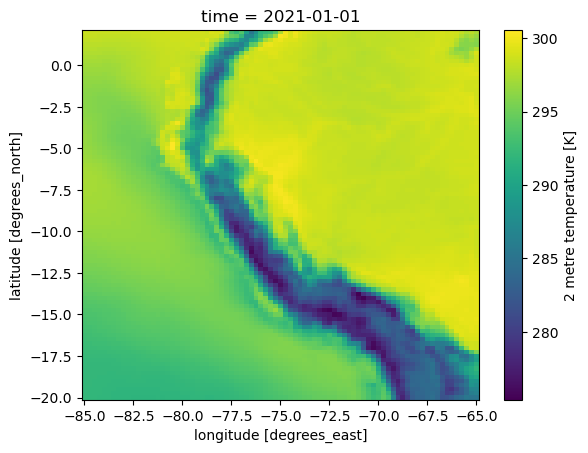

In [5]:
# Vamos a seleccionar el tiempo 1 y conservar las lons y lats.
ds['t2m'][0].plot()

### Vamos importar algunas funciones de **`cartopy`**

In [6]:
from cartopy.io.shapereader import Reader as ShapeReader
from cartopy.crs import PlateCarree

Vamos a definir una proyección para usarlo luego.

In [7]:
projection = PlateCarree()

###  Importamos **`numpy`** para hacer algunas operaciones

In [8]:
import numpy as np

Por ejemplo convertimos la temperatura de **°K** para **°C**. Además, creamos como matrices la latitud y longitud. 

In [9]:
T = ds['t2m'][0]-273.16
U = ds['u10'][0]
V = ds['v10'][0]

lat = ds['latitude']
lon = ds['longitude']
lon, lat = np.meshgrid(lon, lat)


### Importamos **`matplotlib`**

In [10]:
from matplotlib import pyplot as plt

Podemos ver los valores mínimo y máximo de la temperatura.

In [11]:
print(T.values.min())
print(T.values.max())

2.2260742
27.399872


### Importamos **`cmaps`** y **`geocat.viz`**

In [12]:
import cmaps
import geocat.viz as gv

In [18]:
# Definir los niveles de contorno
clevs = np.linspace(T.values.min()-0.5, T.values.max()+0.5, 12, dtype=float).round()

# Importando la base del colormap para trabajar
newcmp = gv.truncate_colormap(cmaps.BkBlAqGrYeOrReViWh200,
                              minval=0.1,
                              maxval=0.6,
                              n=len(clevs))


/home/christian/miniconda3/envs/geocat/lib/python3.9/site-packages/geocat/viz/util.py:550: UserWarning: Trying to register the cmap 'trunc(BkBlAqGrYeOrReViWh200,0.10,0.60)' which already exists.
  cm.register_cmap(name, new_cmap)


### Ahora vamos a crear nuestro figura

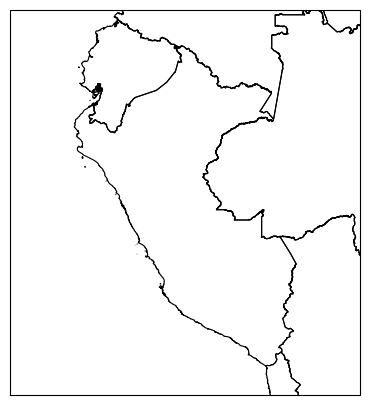

In [16]:
# Genere una figura (establezca su tamaño (ancho, alto) en pulgadas) y ejes usando Cartopy
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=projection)

# Aquí definimos los limites de nuestra figura
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=projection)

# Podemos agregar una información vectorial como un shapefile 
fname = '../../data/shapefiles/vc965bq8111.shp'
ax.add_geometries(ShapeReader(fname).geometries(), facecolor='none', edgecolor='k', lw=0.8, crs=projection)


### Agregamos la temperatura

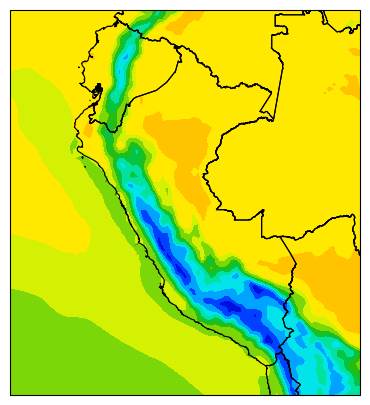

In [19]:
# Genere una figura (establezca su tamaño (ancho, alto) en pulgadas) y ejes usando Cartopy
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=projection)

# Aquí definimos los limites de nuestra figura
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=projection)

# Podemos agregar una información vectorial como un shapefile 
fname = '../../data/shapefiles/vc965bq8111.shp'
ax.add_geometries(ShapeReader(fname).geometries(), facecolor='none', edgecolor='k', lw=0.8, crs=projection)

# Ahora agregamos el campo de la temperatura
cf = ax.contourf(lon,lat, T.values, levels=clevs, cmap=newcmp, zorder=1)

### Ahora agregamos la paleta de colores

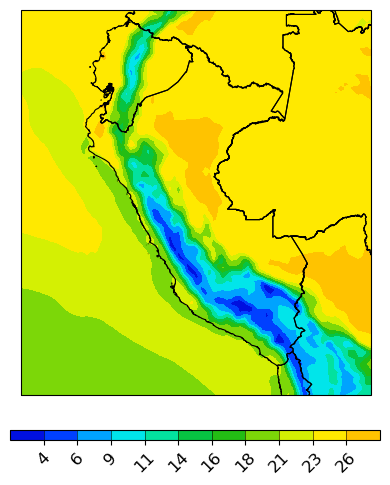

In [20]:
# Genere una figura (establezca su tamaño (ancho, alto) en pulgadas) y ejes usando Cartopy
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=projection)

# Aquí definimos los limites de nuestra figura
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=projection)

# Podemos agregar una información vectorial como un shapefile 
fname = '../../data/shapefiles/vc965bq8111.shp'
ax.add_geometries(ShapeReader(fname).geometries(), facecolor='none', edgecolor='k', lw=0.8, crs=projection)

# Ahora agregamos el campo de la temperatura
cf = ax.contourf(lon,lat, T.values, levels=clevs, cmap=newcmp, zorder=1)

#  vertical y horizontal  
cax = plt.axes((0.14, 0.02, 0.74, 0.02))
cbar = plt.colorbar(cf,
                    ax=ax,
                    cax=cax,
                    ticks=(clevs[1:-1]),
                    drawedges=True,
                    orientation='horizontal')
cbar.ax.tick_params(labelsize=12, rotation=45)


### Vamos agregar los campos de viento

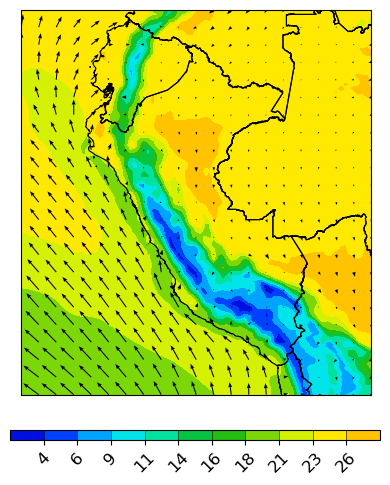

In [26]:
# Genere una figura (establezca su tamaño (ancho, alto) en pulgadas) y ejes usando Cartopy
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=projection)
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=projection)

fname = '../../data/shapefiles/vc965bq8111.shp'
ax.add_geometries(ShapeReader(fname).geometries(), facecolor='none', edgecolor='k', lw=0.8, crs=projection)


cf = ax.contourf(lon,lat, T.values, levels=clevs, cmap=newcmp, zorder=1)

#  vertical y horizontal  
cax = plt.axes((0.14, 0.02, 0.74, 0.02))
cbar = plt.colorbar(cf,
                    ax=ax,
                    cax=cax,
                    ticks=(clevs[1:-1]),
                    drawedges=True,
                    orientation='horizontal')
cbar.ax.tick_params(labelsize=12, rotation=45)

# Agregamos los vectores del viento con quiver

dim_grid = 4
Q = ax.quiver(lon[::dim_grid,::dim_grid],
              lat[::dim_grid,::dim_grid],
              U[::dim_grid,::dim_grid],
              V[::dim_grid,::dim_grid],
              color='black',
              width=.003,
              scale=120.,
              headwidth=3.75,
              zorder=4)


### Ahora agregaremos alguna información del viento

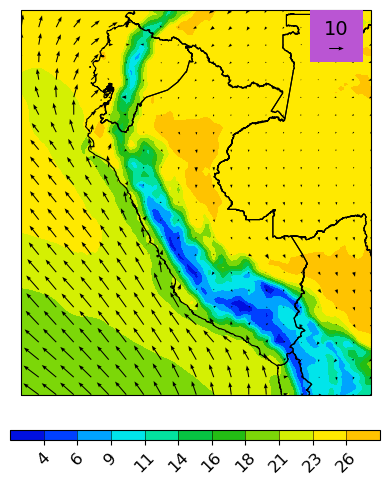

In [27]:
# Genere una figura (establezca su tamaño (ancho, alto) en pulgadas) y ejes usando Cartopy
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=projection)
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=projection)

fname = '../../data/shapefiles/vc965bq8111.shp'
ax.add_geometries(ShapeReader(fname).geometries(), facecolor='none', edgecolor='k', lw=0.8, crs=projection)


cf = ax.contourf(lon,lat, T.values, levels=clevs, cmap=newcmp, zorder=1)

#  vertical y horizontal  
cax = plt.axes((0.14, 0.02, 0.74, 0.02))
cbar = plt.colorbar(cf,
                    ax=ax,
                    cax=cax,
                    ticks=(clevs[1:-1]),
                    drawedges=True,
                    orientation='horizontal')
cbar.ax.tick_params(labelsize=12, rotation=45)

# Agregamos los vectores del viento con quiver

dim_grid = 4
Q = ax.quiver(lon[::dim_grid,::dim_grid],
              lat[::dim_grid,::dim_grid],
              U[::dim_grid,::dim_grid],
              V[::dim_grid,::dim_grid],
              color='black',
              width=.003,
              scale=120.,
              headwidth=3.75,
              zorder=4)

# Dibujo del cuadro del vector de velocidad de referencia
rect = plt.Rectangle((-68.5, -1),
                     3,
                     3,
                     facecolor='mediumorchid',
                     edgecolor=None,
                     zorder=4)
ax.add_patch(rect)

ax.quiverkey(Q,
             0.9,
             0.9,
             5,
             '10',
             labelpos='N',
             color='black',
             coordinates='axes',
             fontproperties={'size': 14},
             labelsep=0.1)


### Ahora agregaremos las etiquetas de la lat y lon. Además guardamos nuestra figura.

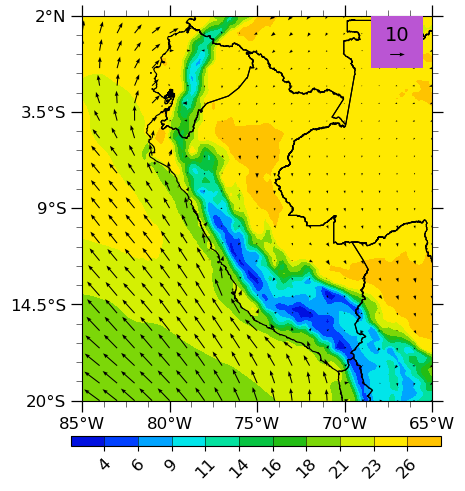

In [28]:
# Genere una figura (establezca su tamaño (ancho, alto) en pulgadas) y ejes usando Cartopy
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=projection)
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=projection)

fname = '../../data/shapefiles/vc965bq8111.shp'
ax.add_geometries(ShapeReader(fname).geometries(), facecolor='none', edgecolor='k', lw=0.8, crs=projection)


cf = ax.contourf(lon,lat, T.values, levels=clevs, cmap=newcmp, zorder=1)

#  vertical y horizontal  
cax = plt.axes((0.14, 0.02, 0.74, 0.02))
cbar = plt.colorbar(cf,
                    ax=ax,
                    cax=cax,
                    ticks=(clevs[1:-1]),
                    drawedges=True,
                    orientation='horizontal')
cbar.ax.tick_params(labelsize=12, rotation=45)

# Agregamos los vectores del viento con quiver

dim_grid = 4
Q = ax.quiver(lon[::dim_grid,::dim_grid],
              lat[::dim_grid,::dim_grid],
              U[::dim_grid,::dim_grid],
              V[::dim_grid,::dim_grid],
              color='black',
              width=.003,
              scale=120.,
              headwidth=3.75,
              zorder=4)

# Dibujo del cuadro del vector de velocidad de referencia
rect = plt.Rectangle((-68.5, -1),
                     3,
                     3,
                     facecolor='mediumorchid',
                     edgecolor=None,
                     zorder=4)
ax.add_patch(rect)

ax.quiverkey(Q,
             0.9,
             0.9,
             5,
             '10',
             labelpos='N',
             color='black',
             coordinates='axes',
             fontproperties={'size': 14},
             labelsep=0.1)

# definimos las caracteristicas de los "ticks"
gv.set_axes_limits_and_ticks(ax,
                             xticks=np.linspace(lon.min(), lon.max(), 5),
                             yticks=np.linspace(lat.min(), lat.max(), 5))

# Adicion de las latitudes y longitudes correspondientes
gv.add_lat_lon_ticklabels(ax)

# configuración de los "ticks" mayores y menores
gv.add_major_minor_ticks(ax,
                         x_minor_per_major=4,
                         y_minor_per_major=5,
                         labelsize=12)

fig.savefig('fig/Temp_202101.png', dpi = 200, facecolor='w', bbox_inches = 'tight', 
            pad_inches = 0.1)